In [20]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.metrics import roc_curve, auc, recall_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasClassifier
from keras import regularizers
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action="ignore")
seed=7
np.random.seed(seed)

In [24]:
# Creating training and testing dataset
dataset=pd.read_csv("/home/inderpreet/Pictures/HR-Employee-Attrition.csv")
dataset['Attrition'] = dataset['Attrition'].map({'Yes': 1, 'No': 0})
print(dataset.Attrition.value_counts())

#Dropping unnecessary columns (Single Value for each record)
dataset=dataset.drop(['EmployeeCount','EmployeeNumber', 'Over18', 'StandardHours'],axis=1)


# One-Hot Encoding
dataset_encoded=pd.get_dummies(dataset)

# Creating testing dataset
train_features,test_features,train_class,test_class=train_test_split(
                                                    dataset_encoded.drop('Attrition',1),
                                                    dataset_encoded['Attrition'],
                                                    test_size=0.2,
                                                    random_state=5
                                                    )

# Creating training and cross-validation dataset
X_train,X_CV,Y_train,Y_CV=train_test_split(train_features,train_class)

# Upsampling training data using SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X_train, Y_train)
print (np.bincount(y_res))

x_res=pd.DataFrame(x_res)
y_res=pd.DataFrame(y_res)

Y_CV=pd.DataFrame(Y_CV)


0    1233
1     237
Name: Attrition, dtype: int64
[744 744]


In [41]:
print(X_train.shape)
print(x_res.shape)
print(X_train.shape[1])

print(x_res.shape)
print(y_res.shape)

x_res=pd.DataFrame(x_res)
y_res=pd.DataFrame(y_res)

(882, 51)
(1488, 51)
51
(1488, 51)
(1488, 1)


In [112]:
nFeatures=X_train.shape[1]
model=Sequential()
model.add(Dense(units=51, input_dim=51, activation='relu'))
model.add(Dense(units=25,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_res.values,y_res.values,epochs=1,batch_size=400)

Epoch 1/1
1488/1488 [==============================] - 1s 726us/step - loss: 0.6926 - acc: 0.5087


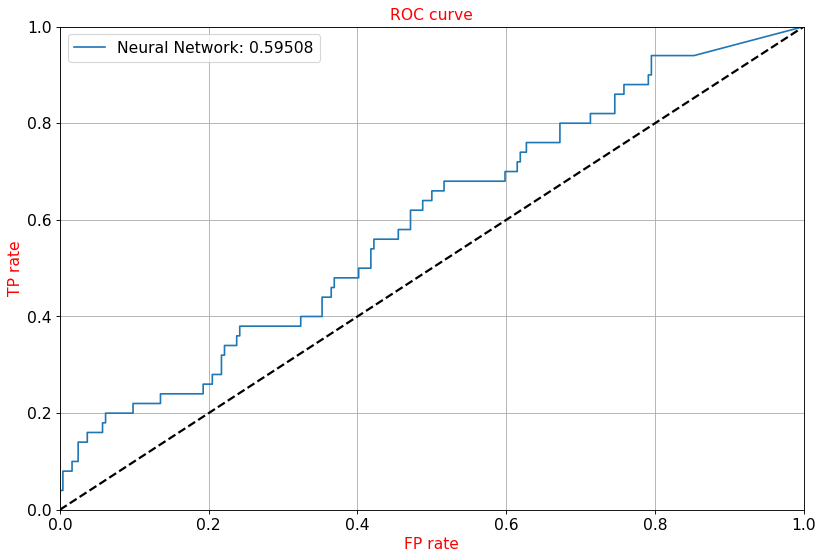

In [113]:
from sklearn.metrics import roc_curve, auc, recall_score
predictions = model.predict(X_CV.values)
fpr_dec, tpr_dec, thresholds = roc_curve(Y_CV, predictions)
roc_auc_dec=auc(fpr_dec,tpr_dec)



# Area under ROC curves to show difference by using upsampling
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 14})
plt.xlabel('FP rate', fontsize=14, color='red')
plt.ylabel('TP rate', fontsize=14, color='red')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('ROC curve', fontsize=14, color='red')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k')
plt.plot(fpr_dec, tpr_dec, label='Neural Network: ' + str(roc_auc_dec)[0:7])
plt.legend(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()